## Preparando ambiente

In [ ]:
install.packages('raster')
require(raster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sp’


Loading required package: raster

Loading required package: sp



In [ ]:
install.packages('rgdal')
require(rgdal)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rgdal

rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-5



In [ ]:
install.packages('neuralnet')
require(neuralnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’


Loading required package: neuralnet



In [ ]:
require(dplyr)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following object is masked from ‘package:neuralnet’:

    compute


The following objects are masked from ‘package:raster’:

    intersect, select, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Pontos de referência para treinamento

In [ ]:
pontosTreinamento = shapefile('cipef_poi.shp')
table(pontosTreinamento@data$class)


 1  2 
26 33 

In [ ]:
aoi = brick('cipef_50cm_v2.tif')
names(aoi) = c("red", "green", 'blue', 'alpha')
aoi = aoi[[-4]]

In [ ]:
sampvals = extract(aoi, pontosTreinamento, df = TRUE)
sampvals = sampvals[, -1]
sampdata = data.frame(classvalue = pontosTreinamento@data$class, sampvals)
head(sampdata)

,classvalue,red,green,blue
,<int>,<dbl>,<dbl>,<dbl>
1,1,91,88,66
2,1,87,96,53
3,1,76,77,51
4,1,72,89,48
5,1,50,65,32
6,1,60,74,33


In [ ]:
sampdata = sampdata %>% mutate(classvalue = ifelse(classvalue == 1,1,0))
table(sampdata$classvalue)


 0  1 
33 26 

## Treinamento

In [ ]:
model = neuralnet(classvalue~., data = sampdata, hidden=3, act.fct = "logistic", linear.output = FALSE)

## Classificação

In [ ]:
imaClass = predict(aoi, model)
imaClass

class      : RasterLayer 
dimensions : 238, 269, 64022  (nrow, ncol, ncell)
resolution : 0.5000711, 0.500208  (x, y)
extent     : 650876.4, 651011, 7986801, 7986920  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
source     : memory
names      : layer 
values     : 9.950157e-06, 0.9778734  (min, max)


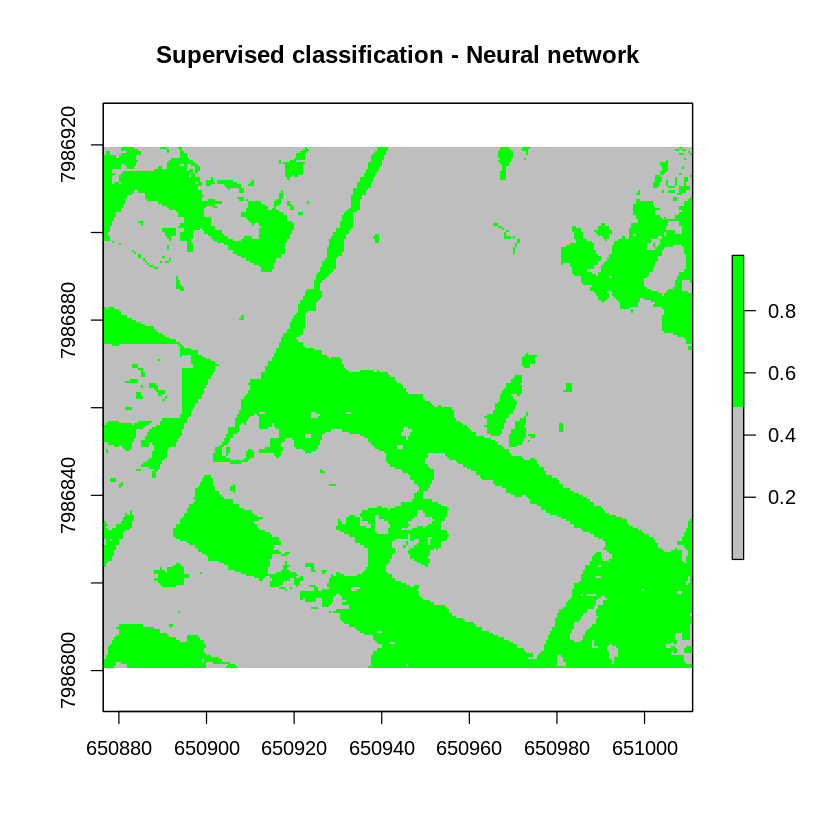

In [ ]:
mycolor <- c("gray", "green")

plot(imaClass, main = 'Supervised classification - Neural network', col=mycolor)